In [2]:
from scipy import stats
import pandas as pd
import os
import sys

DATA_PATH = os.path.join(os.getcwd(), 'data')
TRACKER_PER_CHANNEL_AND_CATEGORY = os.path.join(DATA_PATH, 'tracker_per_channel.csv')

df = pd.read_csv(TRACKER_PER_CHANNEL_AND_CATEGORY)
df

,channelid,channel_category,trackers
0,7_1448_1776_0_1031_5312_1,{'Unknown'},1648
1,7_1558_2931_0_7_61_133,{'General'},57550
2,7_23_789_0_1091_28805_1,{'General'},2935
3,7_20_283_0_1082_20005_1,{'General'},1502
4,7_1_433_0_1108_12122_1,{'Religion'},56
...,...,...,...
380,7_1558_2940_0_7_774_133,{'Music'},5
381,7_1430_1273_0_1002_5001_1,{'News'},1
382,7_1409_2094_0_15_38_133,{'Unknown'},2
383,7_28_890_0_1115_13141_1,{'General'},1


# Statistical Analysis

In [21]:
grouped_df = df.groupby('channel_category')

df1 = grouped_df.get_group("{'Culture'}")['trackers']
df2 = grouped_df.get_group("{'Travel'}")['trackers']
df3 = grouped_df.get_group("{'General'}")['trackers']
df4 = grouped_df.get_group("{'Music'}")['trackers']
df5 = grouped_df.get_group("{None}")['trackers']
df6 = grouped_df.get_group("{'News'}")['trackers']
df7 = grouped_df.get_group("{'News', 'General', 'Politics'}")['trackers']
df8 = grouped_df.get_group("{'Religion'}")['trackers']
df9 = grouped_df.get_group("{'Children'}")['trackers']
df10 = grouped_df.get_group("{'Shopping'}")['trackers']
df11 = grouped_df.get_group("{'Unknown'}")['trackers']
df12 = grouped_df.get_group("{'Sports'}")['trackers']
df13 = grouped_df.get_group("{'Documentary'}")['trackers']
df14 = grouped_df.get_group("{'General', 'Music'}")['trackers']
df15 = grouped_df.get_group("{'Music', 'Education', 'Culture'}")['trackers']
df16 = grouped_df.get_group("{'General', 'Music', 'Children'}")['trackers']


In [22]:
kruskal_channel_category = stats.kruskal(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16)

n = len(df)

def compute_eta_square(h, k, n):
    """
    Computes the eta^2 ("eta square") value:
    eta2[h] = (h - k + 1) / (n - k)

    :param h: The result of the test. Not the p-value!
    :param k: The number of different categories
    :param n: The numbe rof samples
    :return:  The computed eta^2 value
    """
    return (h - k + 1) / (n - k)

eta_square = compute_eta_square(kruskal_channel_category[0], 16, n)

print("channel-category ~ tracker: ", kruskal_channel_category[1] , "(", eta_square, ")")

channel-category ~ tracker:  6.923656529783672e-05 ( 0.0820511557001969 )


# Plotting
Plotting difference charts for channel category and channels itself.

## Bar Chart



In [2]:
df_tracker = pd.read_csv(os.path.join(DATA_PATH, 'pixel_fingerprints_cookies_per_category.csv'))
df_tracker

,channel_category,tracking_pixel,fingerprints,tracking_cookies
0,{'General'},1538,3814,195291
1,{'Unknown'},55,160,43850
2,"{'General', 'Music', 'Children'}",66,152,18483
3,{'Documentary'},0,29,14317
4,{'Sports'},779,22,3436
5,{'Children'},8,1707,231
6,{'Music'},2,11,1089
7,{None},0,49,549
8,{'Religion'},0,37,93
9,{'Shopping'},0,46,47


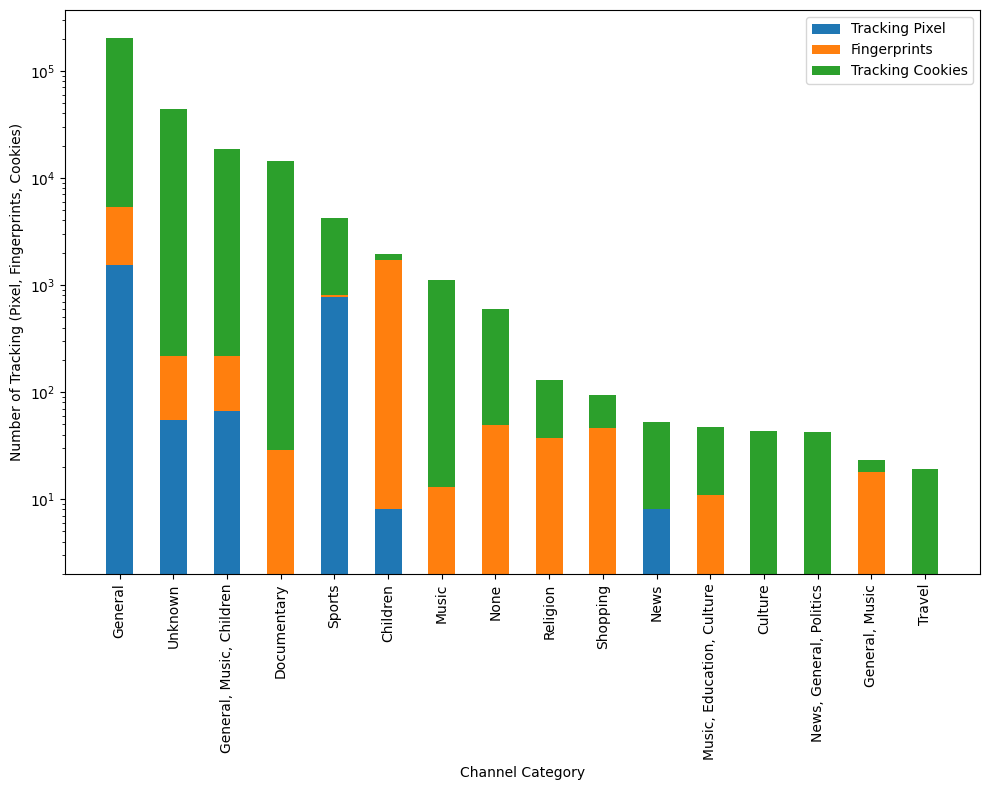

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data
channel_category = ['General', 'Unknown', 'General, Music, Children', 'Documentary', 'Sports',
                    'Children', 'Music', 'None', 'Religion', 'Shopping', 'News',
                    'Music, Education, Culture', 'Culture', 'News, General, Politics',
                    'General, Music', 'Travel']
tracking_pixel = [1538, 55, 66, 0, 779, 8, 2, 0, 0, 0, 8, 0, 0, 0, 0, 0]
fingerprints = [3814, 160, 152, 29, 22, 1707, 11, 49, 37, 46, 0, 11, 1, 0, 18, 0]
tracking_cookies = [195291, 43850, 18483, 14317, 3436, 231, 1089, 549, 93, 47, 44, 36, 42, 42, 5, 19]

# Stacked bar chart creation
labels = channel_category
bar_width = 0.5
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 8))

# Stacked bars
ax.bar(x, tracking_pixel, bar_width, label='Tracking Pixel')
ax.bar(x, fingerprints, bar_width, bottom=tracking_pixel, label='Fingerprints')
ax.bar(x, tracking_cookies, bar_width, bottom=np.array(tracking_pixel) + np.array(fingerprints), label='Tracking Cookies')

# Customizing chart
ax.set_xlabel('Channel Category')
ax.set_ylabel('Number of Tracking (Pixel, Fingerprints, Cookies)')
ax.set_yscale('log')
#ax.set_title('Stacked Bar Chart of Tracking Pixels, Fingerprints, and Tracking Cookies by Channel Category')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

# Display chart
plt.tight_layout()
#plt.show()

plt.savefig(os.path.join(os.getcwd(),'plots',"Channel_Category_Tracker_Stacked_Barchart.pdf"), format="pdf", orientation='landscape')



## Box Plot

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df_tracker = pd.read_csv(os.path.join(DATA_PATH, 'tracker_channel_id_category.csv'))

df_tracker['total_tracker'] = df_tracker["tracking_pixel"] + df_tracker["fingerprints"] + df_tracker["tracking_cookies"]

df_tracker

,channel_id,channel_category,tracking_pixel,fingerprints,tracking_cookies,total_tracker
0,7_1558_2931_0_7_61_133,{'General'},0,5,59305,59310
1,7_21_760_0_7_61_133,{'General'},0,3,6083,6086
2,7_1558_2941_0_7_71_133,{'Documentary'},0,5,4956,4961
3,7_1415_1878_0_7_71_133,{'Documentary'},0,7,4939,4946
4,7_1486_2761_0_1005_13313_1,{'Unknown'},0,5,4751,4756
...,...,...,...,...,...,...
384,7_1553_2853_0_3_341_133,{'Sports'},0,0,0,0
385,7_1460_1614_0_1053_21104_1,{'General'},0,0,0,0
386,7_88_742_0_8_297_133,{'Sports'},0,0,0,0
387,7_1413_1948_0_5_1794_133,{'General'},0,0,0,0


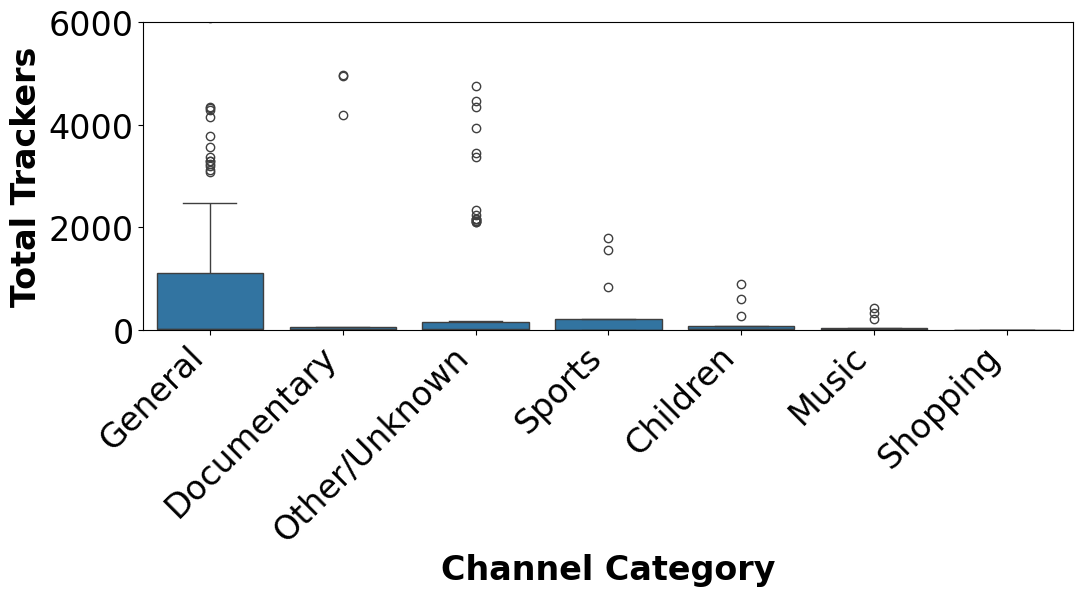

In [17]:
# Re-load the necessary libraries since execution state was reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_tracker

# Clean and preprocess data
df['channel_category'] = df['channel_category'].str.strip("{}").str.replace("'", "")  # Remove curly brackets and single quotes
df['total_tracker'] = df['tracking_pixel'] + df['fingerprints'] + df['tracking_cookies']


# Replace 'None' and 'Unknown' categories with 'Other'
df['channel_category'] = df['channel_category'].replace({'None': 'Other', 'Unknown': 'Other'})
df['channel_category'] = df['channel_category'].replace({'Music, Education, Culture': 'Music', 'General, Music': 'General', 'News, General, Politics': 'News', 'General, Music, Children': 'General'})
df['channel_category'] = df['channel_category'].replace({'Other': 'Other/Unknown'})

# Group categories with fewer than 10 occurrences into "Other"
category_counts = df['channel_category'].value_counts()
categories_to_group = category_counts[category_counts < 10].index
df['channel_category'] = df['channel_category'].apply(lambda x: 'Other' if x in categories_to_group else x)

# Rename "Other" to "Other/Unknown"
df['channel_category'] = df['channel_category'].replace({'Other': 'Other/Unknown'})

# Compute max total trackers per category and sort in descending order
category_medians = df.groupby('channel_category')['total_tracker'].max()
sorted_categories_desc = category_medians.sort_values(ascending=False).index

# Create the box plot with ordered categories
plt.figure(figsize=(12, 4))
sns.boxplot(x='channel_category', y='total_tracker', data=df, order=sorted_categories_desc)

plt.rc('font', size=24)

# Customize plot
plt.title("")
plt.xlabel("Channel Category", fontweight='bold')
plt.ylabel("Total Trackers", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 6000)  # Cut the y-axis at 10k to remove the outlier

# Show the plot
output_path = os.path.join(os.getcwd(), 'plots', 'box-plot.pdf')
plt.savefig(output_path, format="pdf", bbox_inches="tight", orientation='landscape')


# Distribution Function of Channels
Plot the distributin function for each channel with their tracker.

In [3]:
df_channel = pd.read_csv(os.path.join(DATA_PATH, 'tracker_per_channel_per_profile.csv'))

C:\Users\boett\AppData\Local\Temp\ipykernel_38548\138468540.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10000)  # Cut the y-axis at 10k to remove the outlier


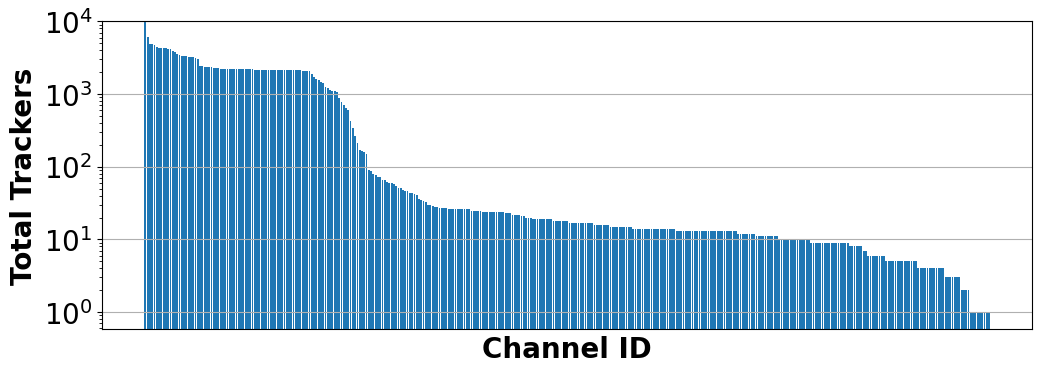

In [14]:
import os
import matplotlib.pyplot as plt

plt.style.use('default')

# Precompute distribution
tracker_distribution = (
    df_channel.groupby("channelid")["tracker"]
    .sum()
    .sort_values(ascending=False)
)

plt.rc('font', size=20)

# Create plot
plt.figure(figsize=(12, 4))
plt.bar(tracker_distribution.index, tracker_distribution.values)
plt.xticks([])
plt.yscale("log")
plt.xlabel("Channel ID", fontweight='bold')
plt.ylabel("Total Trackers", fontweight='bold')
plt.title("")  # Left blank as in the original example
plt.grid(axis="y")
plt.ylim(0, 10000)  # Cut the y-axis at 10k to remove the outlier


# Save plot
output_path = os.path.join(os.getcwd(), 'plots', 'distribution_function_channel.pdf')
plt.savefig(output_path, format="pdf", bbox_inches="tight", orientation='landscape')
